In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# data generation
np.random.seed(43)
no_features=5
no_samples=500
X=np.random.randn(no_samples,no_features)
W_true=np.array([1,3,6,3,2])
b_true=np.array(7)
noise=np.random.randn(500)
Y=np.dot(X,W_true)+ b_true+noise

X.shape,W_true.shape,b_true.shape,Y.shape,noise.shape



((500, 5), (5,), (), (500,), (500,))

In [3]:
# split the data randomly into train,dev,test sets

def split_data(X,Y,train=0.8):
    indices = np.arange(len(X))
    np.random.shuffle(indices)  
    
    train_split = int(train * len(X))
    train_idx, test_idx = indices[:train_split], indices[train_split:]
    
    X_train, Y_train = np.array([X[i] for i in train_idx]), np.array(Y[train_idx])
    X_test, Y_test = np.array([X[i] for i in test_idx]),np.array(Y[test_idx])
    
    return X_train, Y_train, X_test, Y_test

def initialize_parameters(no_features):
    np.random.seed(42)
    W=np.random.randn(no_features)
    b=np.zeros(1)
    return W,b    

# MSE Loss
def loss_fn(y_preds,y_true):
    return np.mean(np.square(y_preds-y_true))


#forward propagation
def forward_propagation(W,b,X):
    return np.dot(X,W)+b


# back_propagation(gradient descent)
def gradient_descent(X,Y,y_preds,W,b,learning_rate):
    diff=(y_preds-Y) #(500,)
    dW = (1/len(Y)) * np.dot(X.T, diff) # (5,500) , (500,)  => (5,)
    db=np.mean(diff)

    # print(diff.shape,X.shape,W.shape,b.shape)
    
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return W,b


def train(X,Y,learning_rate,loss_fn,epochs=1,no_features=1):
    W,b=initialize_parameters(no_features)
    losses=[]
    for i in range(epochs):
        y_preds=forward_propagation(W,b,X)
        losses.append(loss_fn(y_preds,Y))

        W,b=gradient_descent(X,Y,y_preds,W,b,learning_rate=learning_rate)
    return W,b,losses



def Normalize(X):
    X_mean = X.mean()
    X_std = X.std()
    X_norm = (X - X_mean) / X_std
    return X_norm, X_mean, X_std

(array([1.00500197, 2.99877108, 5.97827194, 3.07587041, 1.9452128 ]),
 array([6.94761545]))

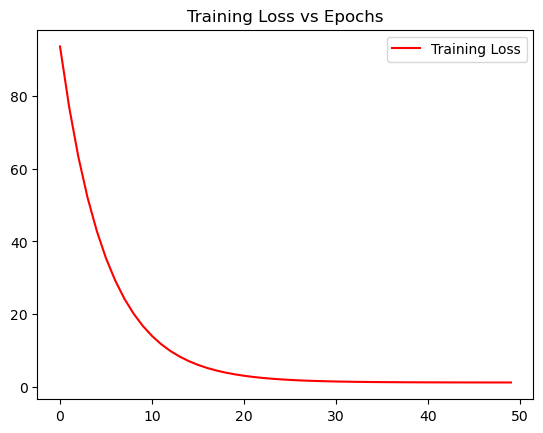

In [6]:
epochs=50
learning_rate=0.1
features_count=len(W_true)
X_train,Y_train,X_test,Y_test=split_data(X,Y,train=0.8)

X_train,X_mean,X_std=Normalize(X_train)

W,b,losses=train(X_train,Y_train,learning_rate=learning_rate,loss_fn=loss_fn,epochs=epochs,no_features=features_count)


plt.plot([i for i in range(epochs)],losses,c="red",label="Training Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.plot()


# Denormalize W and b
W = W / X_std
b = b - np.sum(W * X_mean)

W,b